In [1]:
import os

def set_project_rood_dir():
    notebook_dir = os.path.dirname(os.path.abspath("__file__"))
    paths = notebook_dir.split("/")

    # remove directory unless notebook/s directory is found
    while len(paths) > 0:
        if paths[-1] == 'notebook' or paths[-1] == 'notebooks':
            paths.pop()
            break
        paths.pop()

    # show error if paths is empty
    if len(paths) == 0:
        print("Current directory: ", notebook_dir)
        raise ValueError("Unable to find notebook/s directory in path")

    root = "/".join(paths)
    os.chdir(root)
    print("Successfully changed working directory: ", root)
    print("Current working directory: ", os.getcwd())


set_project_rood_dir()


Successfully changed working directory:  /Users/suraj/vscode/aiml/kaggle/binary_prediction_rainfall_dataset
Current working directory:  /Users/suraj/vscode/aiml/kaggle/binary_prediction_rainfall_dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DATA_PATH = "data/raw/train.csv"
TEST_DATA_PATH = "data/raw/test.csv"

In [8]:
df = pd.read_csv(DATA_PATH, index_col=0)
test_df = pd.read_csv(TEST_DATA_PATH, index_col=0)

In [9]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [10]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1
2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2190 non-null   int64  
 1   pressure       2190 non-null   float64
 2   maxtemp        2190 non-null   float64
 3   temparature    2190 non-null   float64
 4   mintemp        2190 non-null   float64
 5   dewpoint       2190 non-null   float64
 6   humidity       2190 non-null   float64
 7   cloud          2190 non-null   float64
 8   sunshine       2190 non-null   float64
 9   winddirection  2190 non-null   float64
 10  windspeed      2190 non-null   float64
 11  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 222.4 KB


In [12]:
df.shape

(2190, 12)

In [20]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [16]:
test_df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
id,,,,,,,,,,,
2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 2190 to 2919
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            730 non-null    int64  
 1   pressure       730 non-null    float64
 2   maxtemp        730 non-null    float64
 3   temparature    730 non-null    float64
 4   mintemp        730 non-null    float64
 5   dewpoint       730 non-null    float64
 6   humidity       730 non-null    float64
 7   cloud          730 non-null    float64
 8   sunshine       730 non-null    float64
 9   winddirection  729 non-null    float64
 10  windspeed      730 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 68.4 KB


In [18]:
test_df.shape

(730, 11)

In [19]:
test_df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

**Note:** since winddirection has one null so keep a median imputer for that

In [21]:
test_df.duplicated().sum()

np.int64(0)

In [22]:
df.corr()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
day,1.000000,0.005337,0.146294,0.153590,0.161475,0.137929,-0.074048,-0.048175,0.060936,0.024800,-0.000199,-0.000462
pressure,0.005337,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012,-0.049886
maxtemp,0.146294,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168,-0.079304
temparature,0.153590,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262,-0.049660
mintemp,0.161475,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871,-0.026841
dewpoint,0.137929,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179,0.081965
humidity,-0.074048,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285,0.454213
cloud,-0.048175,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698,0.641191
sunshine,0.060936,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752,-0.555287
winddirection,0.024800,-0.643293,0.662235,0.668963,0.663828,0.643073,-0.012430,-0.127087,0.272235,1.000000,-0.192417,-0.006939


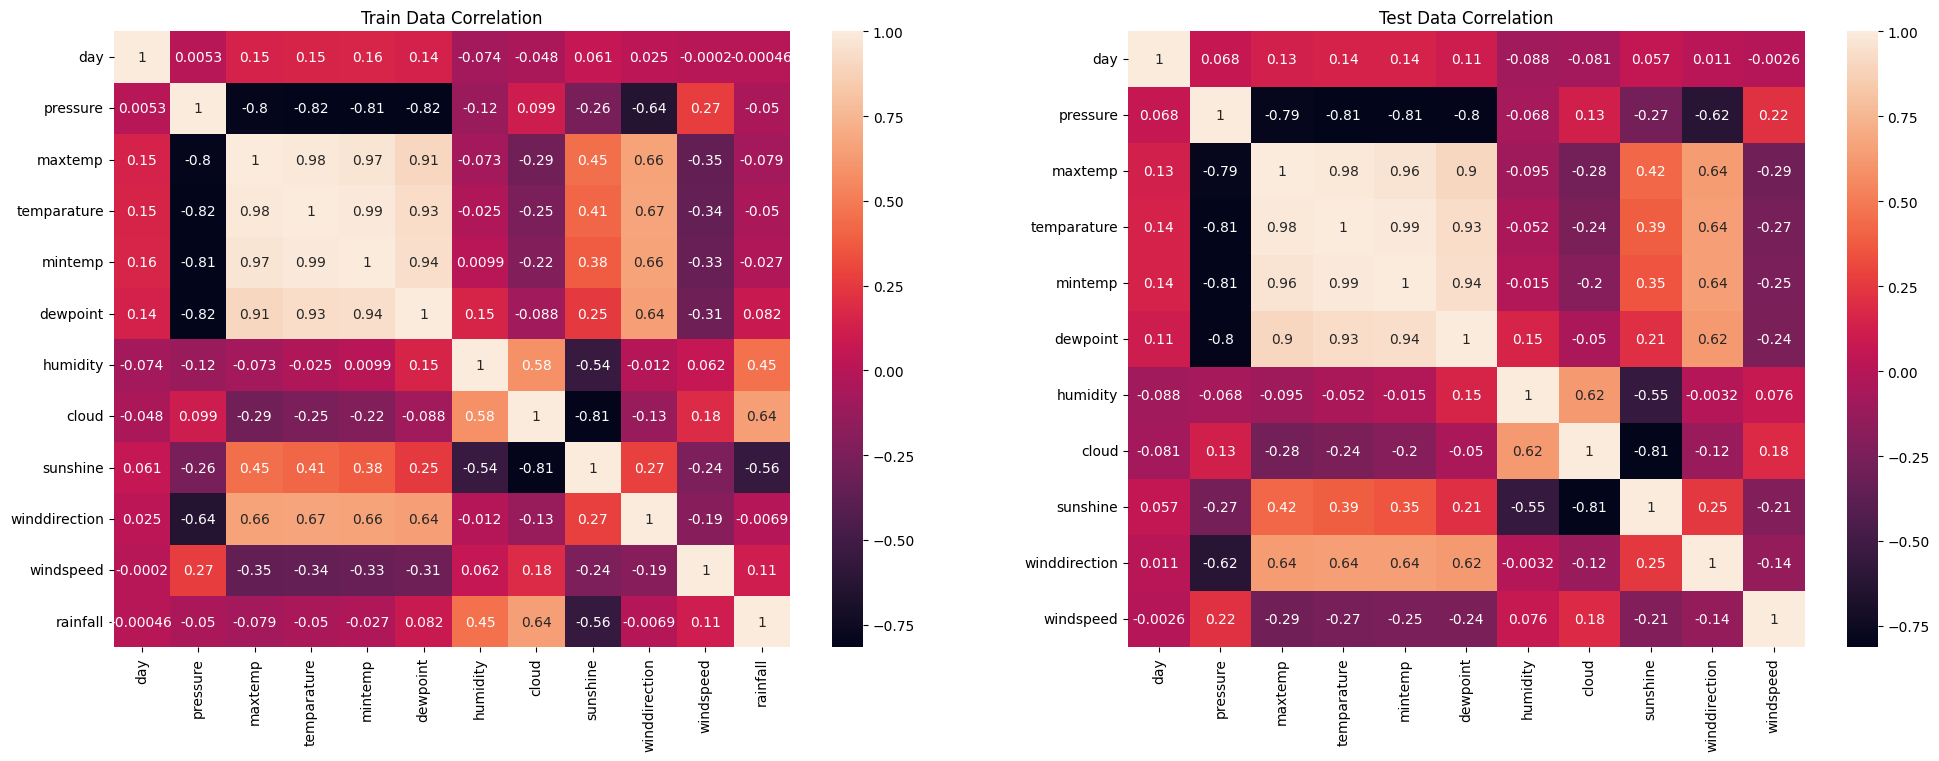

In [28]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot=True)
plt.title('Train Data Correlation')

plt.subplot(1, 2, 2)
sns.heatmap(test_df.corr(), annot=True)
plt.title('Test Data Correlation')

plt.show()

**Note:** here pressure, (maxtemp, temparature, mintemp, dewpoint) are highly interdependent to each other also pressure and winddirection  are interdependent by -0.64

In [25]:
test_df.corr()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
day,1.000000,0.068191,0.128941,0.144455,0.144265,0.107246,-0.088126,-0.080548,0.056568,0.010907,-0.002584
pressure,0.068191,1.000000,-0.790546,-0.808045,-0.810540,-0.803696,-0.068375,0.126905,-0.269497,-0.620377,0.217307
maxtemp,0.128941,-0.790546,1.000000,0.979282,0.960083,0.903064,-0.094952,-0.279086,0.421306,0.635287,-0.290388
temparature,0.144455,-0.808045,0.979282,1.000000,0.987723,0.934134,-0.051753,-0.241033,0.388737,0.642149,-0.266677
mintemp,0.144265,-0.810540,0.960083,0.987723,1.000000,0.940106,-0.015096,-0.203952,0.352327,0.643158,-0.250437
dewpoint,0.107246,-0.803696,0.903064,0.934134,0.940106,1.000000,0.154086,-0.049519,0.209458,0.618630,-0.239695
humidity,-0.088126,-0.068375,-0.094952,-0.051753,-0.015096,0.154086,1.000000,0.618321,-0.554936,-0.003246,0.075676
cloud,-0.080548,0.126905,-0.279086,-0.241033,-0.203952,-0.049519,0.618321,1.000000,-0.813069,-0.118833,0.182042
sunshine,0.056568,-0.269497,0.421306,0.388737,0.352327,0.209458,-0.554936,-0.813069,1.000000,0.248533,-0.213461
winddirection,0.010907,-0.620377,0.635287,0.642149,0.643158,0.618630,-0.003246,-0.118833,0.248533,1.000000,-0.139357


In [31]:
df.cov()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
day,11067.795875,3.175442,87.024000,84.384968,85.943225,76.737993,-60.767872,-91.361546,23.247291,208.727426,-0.206747,-0.020952
pressure,3.175442,31.983161,-25.597802,-24.115943,-23.302467,-24.434969,-5.291627,10.051899,-5.273960,-291.053297,14.891520,-0.121627
maxtemp,87.024000,-25.597802,31.971452,29.025219,27.619854,27.112580,-3.202862,-29.461868,9.275956,299.568602,-19.822882,-0.193316
temparature,84.384968,-24.115943,29.025219,27.273565,26.081291,25.784856,-1.019116,-23.474686,7.840753,279.496227,-17.693178,-0.111808
mintemp,85.943225,-23.302467,27.619854,26.081291,25.594697,25.185297,0.390358,-20.008778,6.962252,268.679062,-16.469343,-0.058543
dewpoint,76.737993,-24.434969,27.112580,25.784856,25.185297,27.967240,6.327791,-8.431690,4.788164,272.074826,-16.341970,0.186873
humidity,-60.767872,-5.291627,-3.202862,-1.019116,0.390358,6.327791,60.850195,82.241319,-15.320399,-7.757310,4.809376,1.527513
cloud,-91.361546,10.051899,-29.461868,-23.474686,-20.008778,-8.431690,82.241319,324.954613,-52.631221,-183.279918,32.957087,4.983022
sunshine,23.247291,-5.273960,9.275956,7.840753,6.962252,4.788164,-15.320399,-52.631221,13.150245,78.979349,-8.677870,-0.868117
winddirection,208.727426,-291.053297,299.568602,279.496227,268.679062,272.074826,-7.757310,-183.279918,78.979349,6400.386513,-152.378150,-0.239332


Temperature, wind direction, and cloud cover show strong interdependencies.
<br>Sunshine and cloud cover have an expected inverse relationship.
<br>Rainfall shows weak covariance with other variables, indicating it may be influenced by non-linear factors.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# Drop non-numeric columns if necessary (e.g., categorical variables)
df_numeric = df.select_dtypes(include=[np.number])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# Display the results
print(vif_data)

          Feature          VIF
0             day     4.155342
1        pressure   266.904764
2         maxtemp   751.950327
3     temparature  1825.813091
4         mintemp   919.312192
5        dewpoint   188.000588
6        humidity   206.110472
7           cloud    66.948431
8        sunshine     7.466904
9   winddirection     5.084439
10      windspeed     6.837256
11       rainfall     7.328686


**Note:** This support that **pressure, maxtemp, temparature, mintemp, dewpoint** have multicollinearity along with humidity and cloud is considerable

In [37]:
tf = df.drop(columns=["temparature", "mintemp", "dewpoint","pressure","humidity"])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = tf.columns
vif_data["VIF"] = [variance_inflation_factor(tf.values, i) for i in range(tf.shape[1])]

# Display the results
print(vif_data)

         Feature        VIF
0            day   4.053654
1        maxtemp  39.071557
2          cloud  27.874430
3       sunshine   5.216681
4  winddirection   4.490582
5      windspeed   5.864017
6       rainfall   7.093165


Investigate maxtemp and cloud further:
<br>If cloud is highly correlated with sunshine, consider dropping either cloud or sunshine.
<br>If maxtemp is still causing issues, check correlation with windspeed or sunshine.